1. generale imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
df = pd.read_csv(r"DatasetExos2.csv", delimiter=";")

In [2]:
df

,ep (ms),Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,ID,Label,Category,Set
0,2019-01-11 15:08:05.200,0.0135,0.977,-0.071,-2.094.366.723,257.720.316,0.9388000000000002,B,bench,heavy,30.0
1,2019-01-11 15:08:05.400,-0.0014999999999999996,0.9704999999999999,-0.07949999999999999,-16.826,-0.8904,21.708,B,bench,heavy,30.0
2,2019-01-11 15:08:05.600,0.0013333333333333333,0.9716666666666667,-0.06433333333333334,526.942.212,-0.2559999999999999,-14.146,B,bench,heavy,30.0
3,2019-01-11 15:08:05.800,-0.024,0.957,-0.0735,8.061,-45.244,-2.073,B,bench,heavy,30.0
4,2019-01-11 15:08:06.000,-0.027999999999999997,0.9576666666666666,-0.115,2.439,-15.486,-36.098,B,bench,heavy,30.0
...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.048,-10.415,-0.0765,14.146,-56.218,0.2926,E,row,medium,40.0
9005,2019-01-20 17:33:27.200,-0.037,1.151.994.539,-0.05333333333333334,-27.684,-0.5854,-1.530.757.122,E,row,medium,40.0
9006,2019-01-20 17:33:27.400,-0.06,274.571.263,-0.08199999999999999,-1.846.542.330,-51.342,-0.12200000000000003,E,row,medium,40.0
9007,2019-01-20 17:33:27.600,-0.03866666666666666,-1.295.977.131,-0.04466666666666667,-0.2318,0.2562,-765.378.561,E,row,medium,40.0


3. Data formatting

In [6]:
to_numeric = ["Acc_x","Acc_y","Acc_z","Gyro_x","Gyro_y","Gyro_z","Set"]
for i in to_numeric:
    df[i]=pd.to_numeric(df[i],errors="coerce")
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 1 to 9008
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ep (ms)   4012 non-null   object 
 1   Acc_x     4012 non-null   float64
 2   Acc_y     4012 non-null   float64
 3   Acc_z     4012 non-null   float64
 4   Gyro_x    4012 non-null   float64
 5   Gyro_y    4012 non-null   float64
 6   Gyro_z    4012 non-null   float64
 7   ID        4012 non-null   object 
 8   Label     4012 non-null   object 
 9   Category  4012 non-null   object 
 10  Set       4012 non-null   float64
dtypes: float64(7), object(4)
memory usage: 376.1+ KB


C:\Users\abdo7\AppData\Local\Temp\ipykernel_9976\2694431648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=pd.to_numeric(df[i],errors="coerce")


2. Scatter plot

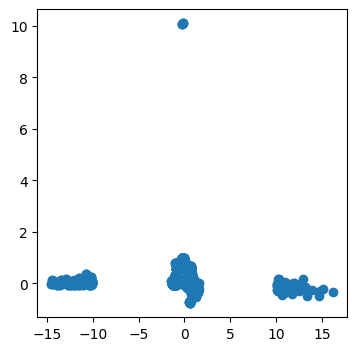

In [7]:
def scatting(x , y):
    plt.figure(figsize=(4, 4))
    plt.scatter(df[x], df[y])
    plt.show()
atr1 , atr2 = input("what are the attribute you want to show in a scatter ? (make sure they are contenious)").split()
if atr1 in to_numeric and atr2 in to_numeric : 
    scatting(atr1 , atr2)
else : 
    print("attribute are not continous scatter made for non categorical data")

3. histogramme / bar charts

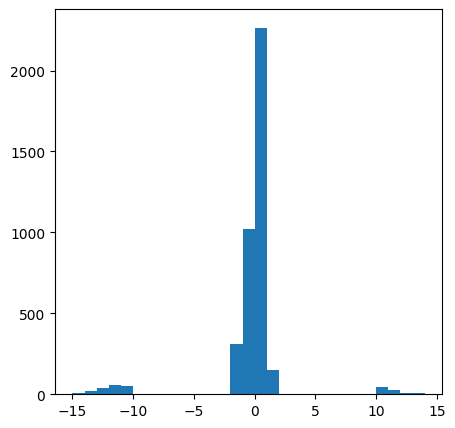

In [50]:
def histo_bar(attribute):
    if attribute in to_numeric:
        plt.figure(figsize=(5, 5))
        plt.hist(df[attribute] , bins = np.arange(-15 , 15 , 1))
        plt.show()
    else: 
        x_pos = df[attribute].unique().tolist()
        plt.bar(x=x_pos, height=df[attribute].value_counts() , color="orange")
        plt.show()
histo_bar("Acc_y")

4. box plot without removing outliers

before removing outlier


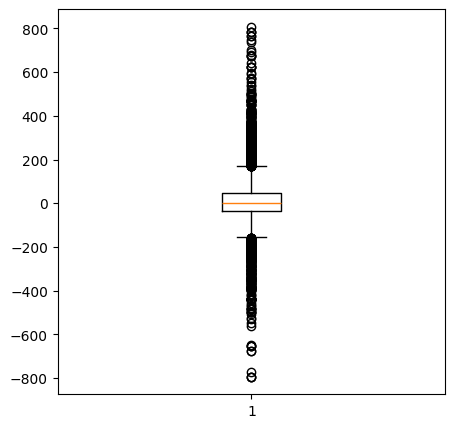

after removing outlier


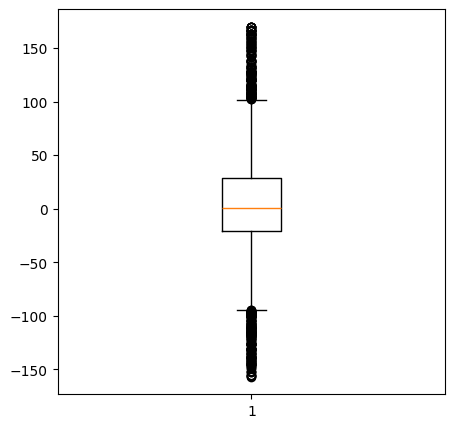

In [63]:
def boxPlot(attribute):
    if attribute in to_numeric:
        print("before removing outlier")
        plt.figure(figsize=(5, 5))
        plt.boxplot(df[attribute])
        plt.show()
        print("after removing outlier")
        Q1 = df[attribute].quantile(0.25)
        Q3 = df[attribute].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        higher_bound = Q3 + 1.5 * IQR
        new_df = df[(df[attribute] > lower_bound) & (df[attribute] < higher_bound)]
        plt.figure(figsize=(5, 5))
        plt.boxplot(new_df[attribute])
        plt.show()
    else: 
        print("couldn't interprete this type of data (categorical one)")
boxPlot("Gyro_z")